In [10]:
print("==================== Loading Packages! ======================")
# Basic Packages I need
import time
start_time = time.time()
import warnings # I hate warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.max_rows=30
pd.options.display.max_columns=50
import numpy as np
r_state=52 #Random State
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
import sklearn
#For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# For text mining
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from collections import Counter
# FOR NN
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
#For Xgboost
import xgboost as xgb
# For Logistic regression
from sklearn.linear_model import LogisticRegression
#For Rforest
from sklearn.ensemble import RandomForestClassifier
#For DTREE
from sklearn import tree
#For SVM
from sklearn import svm


print("==================== Packages Loaded ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Loading Packages! ======================
==================== Packages Loaded ======================
Duration: --- 5.628665288289388e-05 Minutes ---


In [2]:
start_time = time.time()
df = pd.read_json('train.json')
df['seperated_ingredients'] = df['ingredients'].apply(','.join)
print("Data Loaded in: --- %s Minutes ---" % ((time.time() - start_time)/60))

Data Loaded in: --- 0.02213383118311564 Minutes ---


In [3]:
df.head()

cuisine     id                                        ingredients  \
0        greek  10259  [romaine lettuce, black olives, grape tomatoes...   
1  southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...   
2     filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3       indian  22213                [water, vegetable oil, wheat, salt]   
4       indian  13162  [black pepper, shallots, cornflour, cayenne pe...   

                               seperated_ingredients  
0  romaine lettuce,black olives,grape tomatoes,ga...  
1  plain flour,ground pepper,salt,tomatoes,ground...  
2  eggs,pepper,salt,mayonaise,cooking oil,green c...  
3                     water,vegetable oil,wheat,salt  
4  black pepper,shallots,cornflour,cayenne pepper...

<a id='part2'></a>
### EDA BEGINS

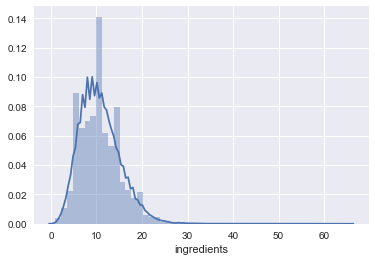

In [4]:
sns.distplot(df['ingredients'].str.len())

In [5]:
print('Maximum Number of Ingredients in a Dish: ',df['ingredients'].str.len().max())
print('Average Number of Ingredients in a Dish: ',round(df['ingredients'].str.len().mean()))
print('Minimum Number of Ingredients in a Dish: ',df['ingredients'].str.len().min())

Maximum Number of Ingredients in a Dish:  65
Average Number of Ingredients in a Dish:  11
Minimum Number of Ingredients in a Dish:  1


In [6]:
print('Dishes having just one Ingredient')
df.loc[df['ingredients'].str.len()==1]

Dishes having just one Ingredient


cuisine     id                 ingredients  \
940       japanese   4734                [sushi rice]   
2088    vietnamese   7833        [dried rice noodles]   
6787        indian  36818      [plain low-fat yogurt]   
7011        indian  19772           [unsalted butter]   
8181      japanese  16116                      [udon]   
8852          thai  29738               [sticky rice]   
8990        indian  41124                    [butter]   
10506      mexican  32631            [corn tortillas]   
13178         thai  29570                   [grained]   
17804  southern_us  29849      [lemonade concentrate]   
18136         thai  39186              [jasmine rice]   
18324       indian  14335           [unsalted butter]   
21008      italian  39221           [cherry tomatoes]   
22119       french  41135                    [butter]   
22387       indian  36874                [cumin seed]   
23512       french  35028            [haricots verts]   
26887      mexican  18593             [vegetable oil]   
29294      spanish   7460           [spanish chorizo]   
30636      spanish  32772  [sweetened condensed milk]   
32105     japanese  12805                     [water]   
34531        greek  10816                    [phyllo]   
37220       indian  27192           [unsalted butter]   

          seperated_ingredients  
940                  sushi rice  
2088         dried rice noodles  
6787       plain low-fat yogurt  
7011            unsalted butter  
8181                       udon  
8852                sticky rice  
8990                     butter  
10506            corn tortillas  
13178                   grained  
17804      lemonade concentrate  
18136              jasmine rice  
18324           unsalted butter  
21008           cherry tomatoes  
22119                    butter  
22387                cumin seed  
23512            haricots verts  
26887             vegetable oil  
29294           spanish chorizo  
30636  sweetened condensed milk  
32105                     water  
34531                    phyllo  
37220           unsalted butter

In [7]:
print('Dish with 65 ingredients!')
df.loc[df['ingredients'].str.len()==65]

Dish with 65 ingredients!


cuisine    id                                        ingredients  \
15289  italian  3885  [fettucine, fresh marjoram, minced garlic, oli...   

                                   seperated_ingredients  
15289  fettucine,fresh marjoram,minced garlic,olive o...

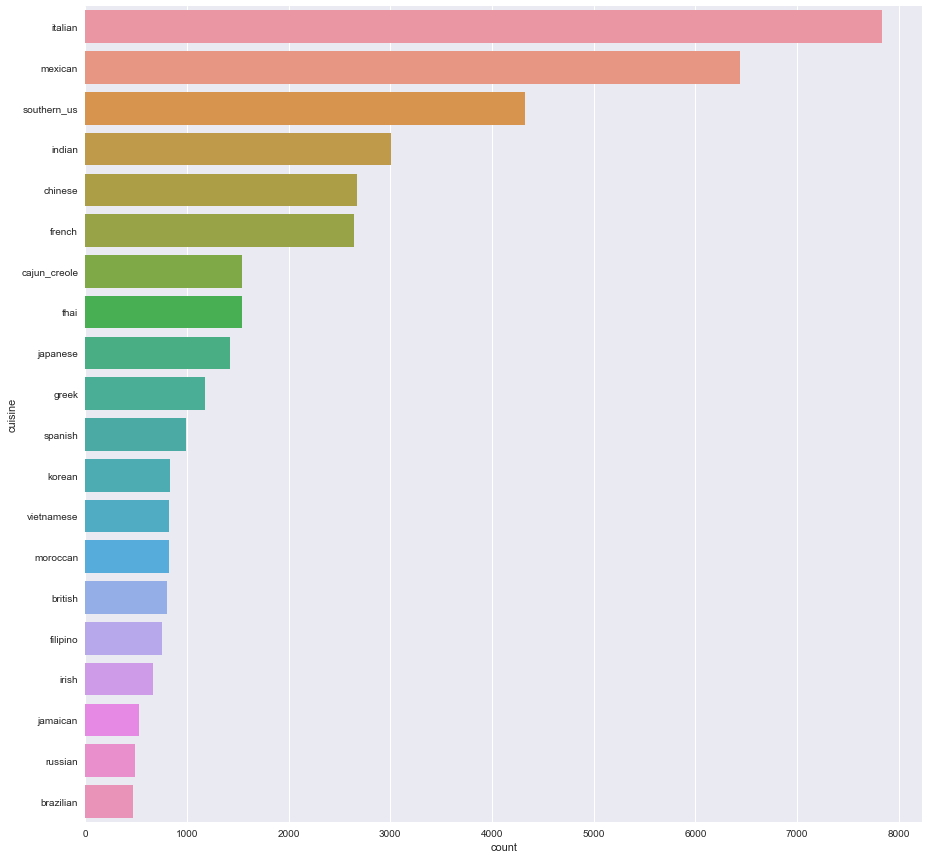

In [8]:
plt.figure(figsize=(15, 15))
sns.countplot(y = 'cuisine',data = df,order = df['cuisine'].value_counts().index)
plt.show()

Now I want to count number of times one particular ingredient has been used across all dishes
* For this I am using a count vectorizer which will create a huge matrix of dishes against ingredients (binarized) from which I can get a count
* So the count vectorizer splits ingredients wherver it gets a comma
* zip functions makes ingredient names and their counts pass as a single argument to dict
* Finally I assign this to apandas data frame

In [9]:
vec = CountVectorizer(tokenizer=lambda x: [i.strip() for i in x.split(',')], lowercase=False)
counts = vec.fit_transform(df['seperated_ingredients']) 
count=dict(zip(vec.get_feature_names(), counts.sum(axis=0).tolist()[0]))
count=pd.DataFrame(list(count.items()),columns=['Ingredient','Count'])

In [10]:
count.sample()

Ingredient  Count
2541       feet      4

Finally what are the top 10 used ingredients


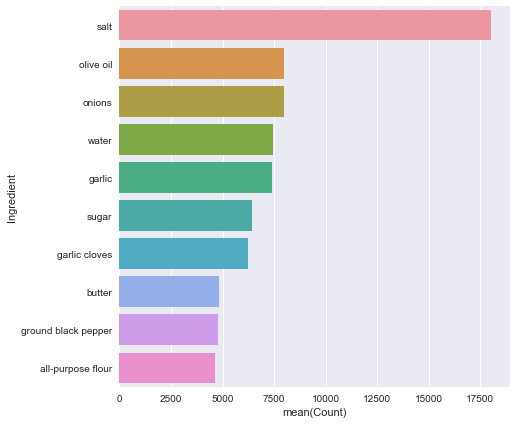

In [11]:
print('Finally what are the top 10 used ingredients')
plt.figure(figsize=(7, 7))
sns.barplot(y = 'Ingredient',x='Count',data=count.sort_values('Count',ascending=False)[:10])
plt.show()

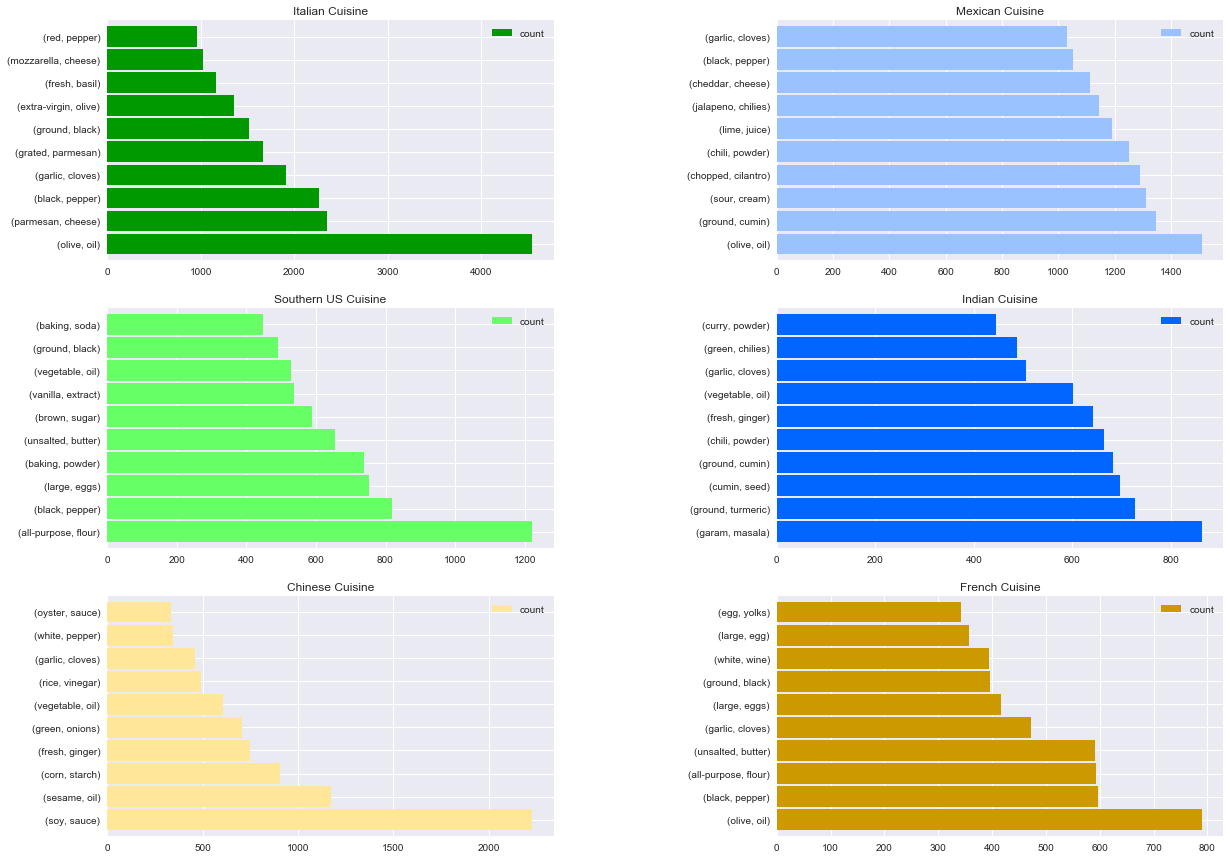

In [12]:
df['for ngrams']=df['seperated_ingredients'].str.replace(',',' ')
f,ax=plt.subplots(3,2,figsize=(20,15))
def ingre_cusine(cuisine):
    frame=df[df['cuisine']==cuisine]
    common=list(nltk.bigrams(nltk.word_tokenize(" ".join(frame['for ngrams']))))
    return pd.DataFrame(Counter(common),index=['count']).T.sort_values('count',ascending=False)[:10]

ingre_cusine('italian').plot.barh(ax=ax[0,0],width=0.9,color='#009900')
ax[0,0].set_title('Italian Cuisine')

ingre_cusine('mexican').plot.barh(ax=ax[0,1],width=0.9,color='#99c2ff')
ax[0,1].set_title('Mexican Cuisine')

ingre_cusine('southern_us').plot.barh(ax=ax[1,0],width=0.9,color='#66ff66')
ax[1,0].set_title('Southern US Cuisine')

ingre_cusine('indian').plot.barh(ax=ax[1,1],width=0.9,color='#0066ff')
ax[1,1].set_title('Indian Cuisine')

ingre_cusine('chinese').plot.barh(ax=ax[2,0],width=0.9,color='#ffe699')
ax[2,0].set_title('Chinese Cuisine')

ingre_cusine('french').plot.barh(ax=ax[2,1],width=0.9,color='#cc9900')
ax[2,1].set_title('French Cuisine')

plt.subplots_adjust(wspace=0.5)

<a id='part3'></a>
### Lets Begin with the modeling 

<a id='part4'></a>
Now because we can have different number of ingredients per dish it could be essential for us to use text mining techniques
* Below I make use of the tfIDF vectorizer to create a sparse matrix and to ensure the rare ingredients are highlighted
* The encoder for y just adds labels to names

#### We tried here count vectorizer model, tf idf , however tf idf worked better

In [4]:
# Converting ingredients into a sparse matrix (Using iverse document frequency, because it highlights unique elements)
vect = TfidfVectorizer(binary=True).fit(df['seperated_ingredients'].values)
X_train_vectorized = vect.transform(df['seperated_ingredients'].values)
X_train_vectorized = X_train_vectorized.astype('float')

# Encoding labels
encoder = LabelEncoder()
y_transformed = encoder.fit_transform(df.cuisine)

#### Splitting data into train test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y_transformed , random_state = r_state,train_size=0.75)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train , random_state = r_state,train_size=0.75)

print("For Main Data Set :",str(X_train_vectorized.shape[0]))
print("For Train Data Set :",str(X_train.shape[0]))
print("For Test Data Set :",str(X_test.shape[0]))
print("For Validation Data Set :",str(X_val.shape[0]))

For Main Data Set : 39774
For Train Data Set : 22372
For Test Data Set : 9944
For Validation Data Set : 7458


<a id='part5'></a>
#### Decision Tree

The top accuracy forecast with cross validation is 55.2%
Obtained with min_impurity_decrease = 0.0


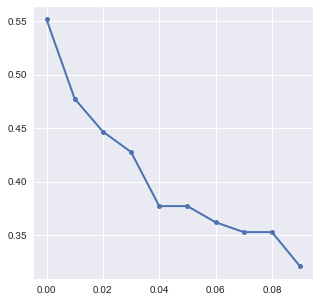

In [28]:
avg_scores = []
parameter_values = np.arange(0,0.1, 0.01)
for mid in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state, min_impurity_decrease = mid)
    scores = cross_val_score(estimator, X_train, y_train, scoring='accuracy', cv = 10)
    avg_scores.append(np.mean(scores))
#print(avg_scores)

plt.figure(figsize=(5,5))
plt.plot(parameter_values, avg_scores, '-o', linewidth=2, markersize=5)
print("The top accuracy forecast with cross validation is {0:.1f}%".format(avg_scores[np.argmax(avg_scores)]*100))
print("Obtained with min_impurity_decrease = {0:.1f}".format(parameter_values[np.argmax(avg_scores)]))

<a id='part6'></a>
#### Random Forests

In [31]:
# Random Forest
model= RandomForestClassifier(max_depth=100,n_estimators=500,oob_score=True,
                              min_samples_split=2,random_state=r_state,min_samples_leaf=4,criterion='gini',max_features=0.7)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.69549477071600962

<a id='part7'></a>
#### Logistic regression
Best c value?

Acc Train: 0.263991, Acc Val:0.268571
Acc Train: 0.283211, Acc Val:0.288147
Acc Train: 0.387672, Acc Val:0.394073
Acc Train: 0.471214, Acc Val:0.475463
Acc Train: 0.618407, Acc Val:0.616787
Acc Train: 0.677990, Acc Val:0.670689
Acc Train: 0.779144, Acc Val:0.749799
Acc Train: 0.807840, Acc Val:0.768705
Acc Train: 0.855936, Acc Val:0.784124
Acc Train: 0.872206, Acc Val:0.784393
Acc Train: 0.896299, Acc Val:0.773800
Acc Train: 0.903406, Acc Val:0.767230
Acc Train: 0.914089, Acc Val:0.749933


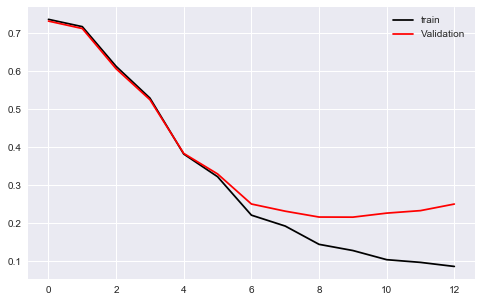

In [7]:
C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = LogisticRegression(C=C_val,max_iter=10000,random_state=r_state)
    clf.fit(X_train , y_train)
    score_train = clf.score(X_train , y_train)
    score_test = clf.score(X_val,y_val)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    #val_error.append(1-score_val) 
    print("Acc Train: %f, Acc Val:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='Validation')
plt.legend(loc=1)
plt.show()

<a id='part8'></a>
#### XGBOOST

In [8]:
# How does XGBOOST perform here?
params = {"objective":"multi:softmax","learning_rate":0.01,"max_depth":20,"subsample":0.2,
          "colsample_bytree":0.5,"seed":r_state,"num_class":20}

# Instantiate the XGBClassifier: xg_cl
xg_cl = xgb.XGBClassifier(params=params)

# Fit the classifier to the training set
xg_cl.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_cl.predict(X_test)

# Compute the accuracy: accuracy
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.727574


<a id='part9'></a>
#### SVM does the trick

In [11]:
models = (svm.SVC(kernel='linear', C=1),
          svm.SVC(kernel='rbf', C=1),
          svm.SVC(kernel='rbf', gamma=1, C=100),
          svm.SVC(kernel='sigmoid', C=1, gamma=0.1, coef0=0.25),
          svm.SVC(kernel='poly', degree=3, gamma=0.5, coef0=0.25, C=1))

for idx,model in enumerate(models):
    model.fit(X_train,y_train)
    tr_error = 1-model.score(X_train,y_train)
    val_error = 1-model.score(X_val,y_val)
    ts_error = 1-model.score(X_test,y_test)
    print("Model:%d, Train Error:%f, Val Error:%f, Test Error:%f"%(idx,tr_error,val_error,ts_error))

Model:0, Train Error:0.146567, Val Error:0.223384, Test Error:0.220233
Model:1, Train Error:0.802432, Val Error:0.799276, Test Error:0.806818
Model:2, Train Error:0.000134, Val Error:0.200590, Test Error:0.202836
Model:3, Train Error:0.280842, Val Error:0.296862, Test Error:0.295756
Model:4, Train Error:0.148534, Val Error:0.243229, Test Error:0.238234


<a id='part10'></a>
#### Neural Networks 

In [13]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(1000,kernel_initializer='uniform', activation='relu', input_shape=(3051,)))

model.add(Dense(500,kernel_initializer='uniform', activation='relu'))

model.add(Dense(250,kernel_initializer='uniform', activation='relu'))

model.add(Dense(100,kernel_initializer='uniform', activation='relu'))

# Add an output layer 
model.add(Dense(20, kernel_initializer='uniform',activation='sigmoid'))

Using TensorFlow backend.


In [15]:
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y)

scores = model.evaluate(X_test, dummy_y_test,verbose=1)
print(scores)

9944/9944 [==============================] - 4s 435us/step
[2.2091385914448853, 0.74064762675752582]
